In [23]:
#importing required libraries
import time 
import numpy as np 
import struct 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.neighbors import NearestNeighbors

In [24]:
#Parsing MNIST data set from .gz files.
start_time = time.time()
with open('train-images.idx3-ubyte', 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8))
    nrows, ncols = struct.unpack(">II", file.read(8))
    train_data = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = train_data.reshape((size, nrows, ncols))
    
with open('train-labels.idx1-ubyte', 'rb') as file:
    train_labels = np.frombuffer(file.read(), dtype = np.int8, offset = 8)

with open('t10k-images.idx3-ubyte', 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8))
    nrows, ncols = struct.unpack(">II", file.read(8))
    test_data = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_data = test_data.reshape((size, nrows, ncols))

with open('t10k-labels.idx1-ubyte', 'rb') as file:
    test_labels = np.frombuffer(file.read(), dtype = np.int8, offset = 8)

print("--- %s seconds ---" % (time.time() - start_time))    

--- 0.02505779266357422 seconds ---


In [25]:
# checking shape of data
start_time = time.time()
print("Training Data Shape: ",train_data.shape)
print("Training Labels Shape: ", train_labels.shape)
print("\nTest Data Shape: ", test_data.shape)
print("Test Labels Shape: ", test_labels.shape)
print("--- %s seconds ---" % (time.time() - start_time))  

Training Data Shape:  (60000, 28, 28)
Training Labels Shape:  (60000,)

Test Data Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)
--- 0.000942230224609375 seconds ---


In [26]:
# preparing training data according to assignment requirement
start_time = time.time()
train_labels_568 = []
train_images_568 = []
train_labels_prep = list(train_labels)

for i in range(len(train_labels_prep)):
    if train_labels_prep[i] == 5 or train_labels_prep[i] == 6 or train_labels_prep[i] == 8:
        train_labels_568.append(train_labels_prep[i])
        train_images_568.append(train_data[i])
        
train_data = np.asarray(train_images_568)
train_labels = np.asarray(train_labels_568)
print("--- %s seconds ---" % (time.time() - start_time))  

--- 0.15272903442382812 seconds ---


In [27]:
# preparing training data according to assignment requirement
start_time = time.time()
test_labels_568 = []
test_images_568 = []
test_labels_prep = list(test_labels)

for i in range(len(test_labels_prep)):
    if test_labels_prep[i] == 5 or test_labels_prep[i] == 6 or test_labels_prep[i] == 8:
        test_labels_568.append(test_labels_prep[i])
        test_images_568.append(test_data[i])

test_data = np.asarray(test_images_568)
test_labels = np.asarray(test_labels_568)
print("--- %s seconds ---" % (time.time() - start_time))  

--- 0.04298114776611328 seconds ---


In [28]:
# checking shape of data
start_time = time.time()
print("Training Data Shape: ",train_data.shape)
print("Training Labels Shape: ", train_labels.shape)
print("\nTest Data Shape: ", test_data.shape)
print("Test Labels Shape: ", test_labels.shape)
print("--- %s seconds ---" % (time.time() - start_time))  

Training Data Shape:  (17190, 28, 28)
Training Labels Shape:  (17190,)

Test Data Shape:  (2824, 28, 28)
Test Labels Shape:  (2824,)
--- 0.0009348392486572266 seconds ---


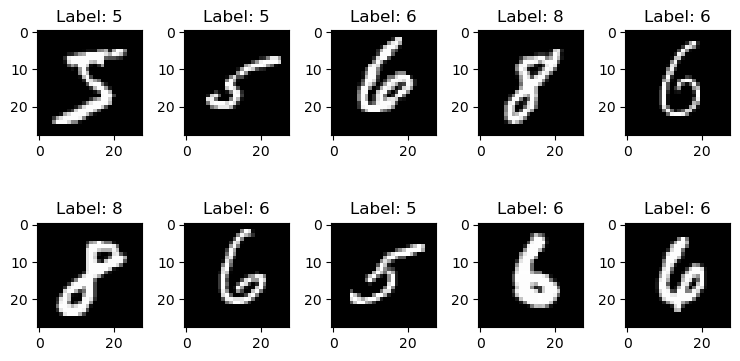

--- 0.3312520980834961 seconds ---


In [29]:
#Plotting MNIST dataset using Matplotlib (Training Set)
start_time = time.time()
num = 10
images = train_data[:num]
labels = train_labels[:num]
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols,2*num_rows))
for i in range(num):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))  

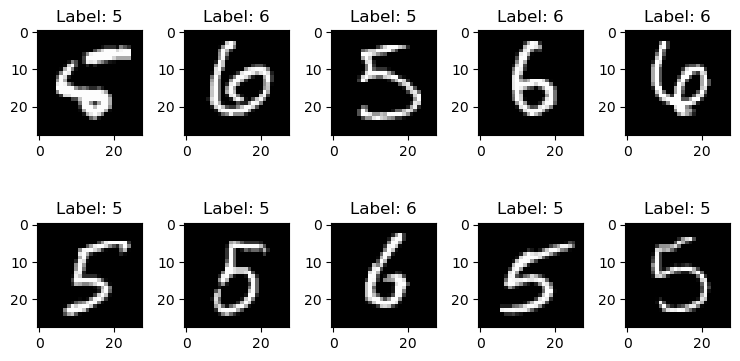

--- 0.38465094566345215 seconds ---


In [30]:
#Plotting MNIST dataset using Matplotlib (Test Set)
start_time = time.time()
num = 10
images = test_data[:num]
labels = test_labels[:num]
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols,2*num_rows))
for i in range(num):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))  

In [31]:
#reshaping train and test data
start_time = time.time()
train_data = train_data.reshape(train_data.shape[0], 784)
test_data = test_data.reshape(test_data.shape[0], 784)
print("--- %s seconds ---" % (time.time() - start_time))  

--- 0.0002942085266113281 seconds ---


In [32]:
# checking shape of data
start_time = time.time()
print("Training Data Shape: ",train_data.shape)
print("Training Labels Shape: ", train_labels.shape)
print("\nTest Data Shape: ", test_data.shape)
print("Test Labels Shape: ", test_labels.shape)

Training Data Shape:  (17190, 784)
Training Labels Shape:  (17190,)

Test Data Shape:  (2824, 784)
Test Labels Shape:  (2824,)


In [33]:
#normalizing X_train and X_test features
start_time = time.time()
train_data = preprocessing.normalize(train_data, norm = 'l2', axis = 0)
test_data = preprocessing.normalize(test_data, norm = 'l2', axis = 0)
print("--- %s seconds ---" % (time.time() - start_time))  

--- 0.0716547966003418 seconds ---


In [34]:
#normalizing X_train and X_test columns
start_time = time.time()
train_data = preprocessing.normalize(train_data, norm = 'l2', axis = 1)
test_data = preprocessing.normalize(test_data, norm = 'l2', axis = 1)
print("--- %s seconds ---" % (time.time() - start_time))  

--- 0.056871891021728516 seconds ---


In [35]:
def dist(X_train, X_test, squared=False):
    '''
    calculates pairwise distance between X_train and X_test
    '''
    M = []
    
    for i in range(len(X_test)):
        dist = [np.sqrt(np.sum((X_test[i]-x_t)**2)) for x_t in X_train]
        M.append(dist)
        
    
    M = np.asarray(M)

    return M  

In [52]:
start_time = time.time()
M = dist(train_data, test_data)
print(M.shape)
print("--- %s seconds ---" % (time.time() - start_time))  

(2824, 17190)
--- 162.9061975479126 seconds ---


In [60]:
def retrieve(i, M, k):
    '''
    Retrieves indices of k nearest points to i
    '''
    test_query = M[i]
    indices = sorted(range(len(test_query)), key = lambda sub: test_query[sub])[:k]
        
    return indices 
  

In [61]:
def precision(y, y_train, I):
    '''
    Calculates precision by comparing y and y_train labels
    '''
    summation = 0
    for index in I:
        if y == y_train[index]:
            summation += 1
    
    return summation / len(I)
  

In [ ]:
def main():
    k = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    
    average_precision = []
    start_time_2 = time.time()
    for n_neighbor in k:
        start_time = time.time()
        prec = []
        for i in range(len(test_data)):
            
            indices = retrieve(i, M, n_neighbor)
            
            prec.append(precision(test_labels[i], train_labels, indices))
        print("Time required for k = {}: {} --- %s seconds ---".format(n_neighbor, time.time() - start_time))    
        average_precision.append(np.mean(prec))
    print("Total time required for retrieving = {}: {} --- %s seconds ---".format(n_neighbor, time.time() - start_time_2))
    plt.plot(k, average_precision)
    plt.xlabel('k_neighbors')
    plt.ylabel('precision')
    plt.show()
    
main()


Time required for k = 1: 13.224194049835205 --- %s seconds ---
Time required for k = 2: 13.092274188995361 --- %s seconds ---
Time required for k = 5: 13.140650033950806 --- %s seconds ---
Time required for k = 10: 12.960615873336792 --- %s seconds ---
